In [1]:
from params import FuzzyInputVariable_3Trapezoids, FuzzyInputVariable_2Trapezoids, FuzzyInputVariable_List_Trapezoids
from operators import productN
import numpy as np
#from helps_and_enhancers import *
import matplotlib.pyplot as plt
from geneticANFIS import ANFIS
import time
import copy
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


<H1>Przygotowanie zbioru danych: XOR<H1>

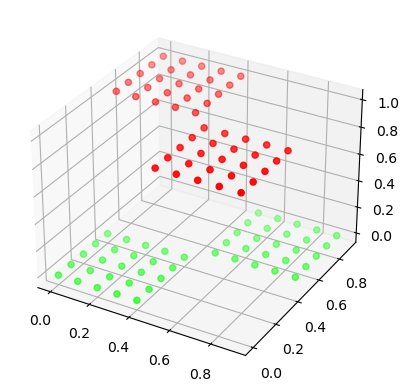

In [2]:
x = np.arange(0, 1, 0.1)
x,y = np.meshgrid(x, x)

dataX = x.flatten()
dataY = y.flatten()
dataXY1 = np.column_stack((dataX,dataY,np.ones(len(dataX))))
dataXY = np.column_stack((dataX,dataY))

data_labels = np.logical_xor(dataX >= 0.5, dataY >= 0.5) 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

rgb = [[1,0,0] if cc else [0,1,0] for cc in data_labels]

ax.scatter(dataX, dataY, data_labels, c=rgb)

plt.show()

<H1>Utworzenie funkcji przynależności</H1>

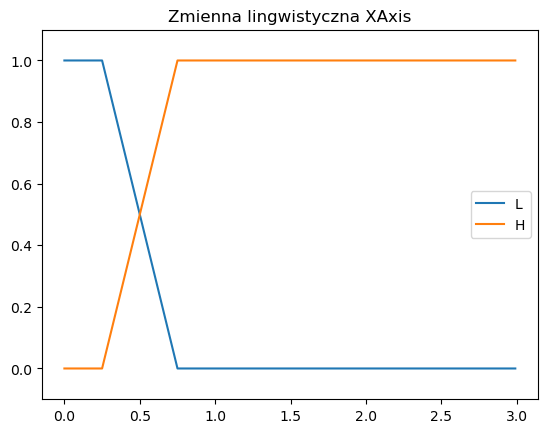

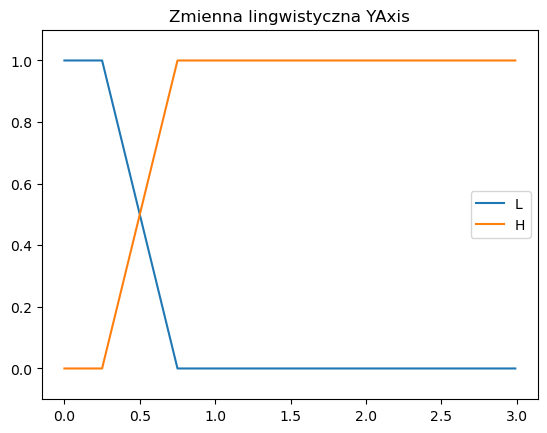

In [3]:
varX = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "XAxis", ["L","H"]) # low, high
varY = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "YAxis", ["L","H"])

#mf1 = [[-0.5, 0.25, 0.25, 0.25], [0.5, 0.25, 0.1, 0.1]]
#varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", ["L","H"])
#varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", ["L","H"])

#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show()
plt.legend()

plt.figure()
varY.show()
plt.legend()

plt.show()

<H1>Inicjalizacja systemu ANFIS</H1>

Parametry początkowe:
Przesłanki:  [[0.5, 0.5], [0.5, 0.5]] 
Konkluzje:  [[0.97713983 0.99664147 0.73408675]
 [0.61237487 0.33245863 0.0287584 ]
 [0.14309161 0.05106271 0.85586137]
 [0.98695948 0.32400694 0.31287272]]


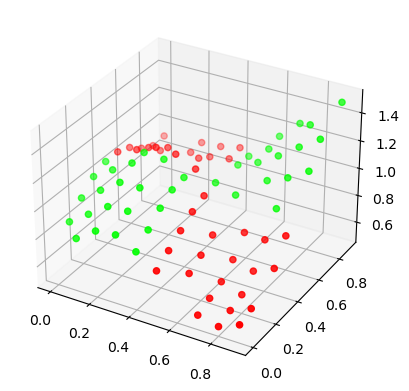

In [4]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train)

print("Parametry początkowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

fis.show_results()

<H1>Uczenie systemu ANFIS</H1>

Current best fitness: 11.5157: 100%|██████████| 1000/1000 [01:30<00:00, 11.02it/s]      

Optymalizacja zakończona!
z blędem:   11.515676201564537
Liczba it:  1000
TIME elapsed:  92.18815541267395


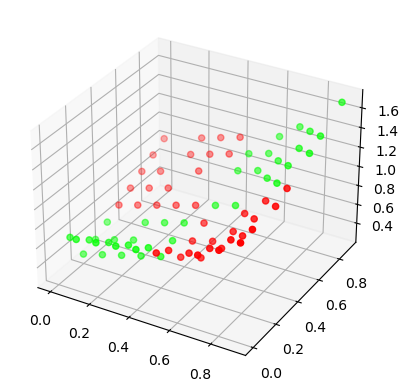

In [5]:
start = time.time()
fis.train(True, True, False, True, n_iter=1000, float_divisions=5000000000)
end = time.time()
print("TIME elapsed: ", end - start)
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results()

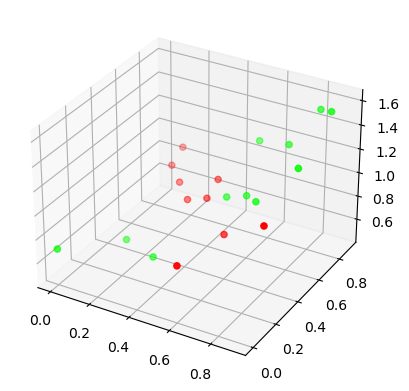

In [6]:
fis.training_data = X_test.T
fis.expected_labels = y_test
fis.show_results()

y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
y_pred = list(map(round,y_pred.flatten()))
# print(confusion_matrix(y_test, y_pred))

In [7]:
print("Parametry początkowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

Parametry początkowe:
Przesłanki:  [[0.79262296 0.33928016]
 [0.13758344 0.14492544]] 
Konkluzje:  [[0.28680344 0.03947136 0.70264151]
 [0.67604234 0.78425095 0.64529557]
 [0.59551174 0.78171188 0.10734549]
 [0.52433774 0.73040721 0.62718042]]


<H1>Sprawdzanie parametrów jakich nauczył się system</H1>

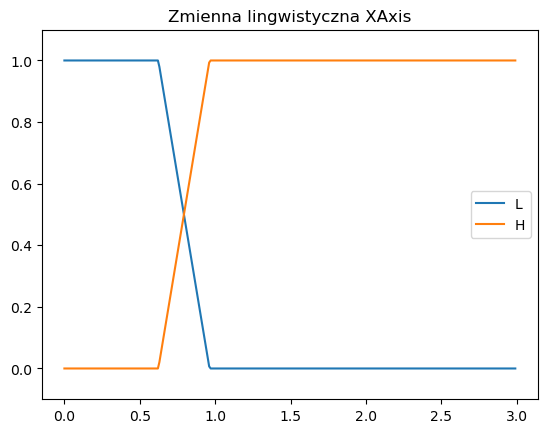

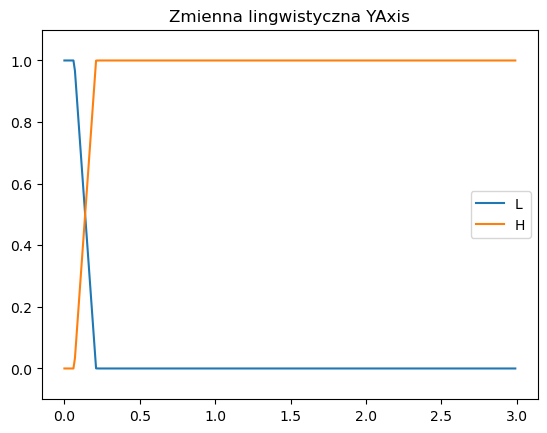

In [8]:
#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show()
plt.legend()

plt.figure()
varY.show()
plt.legend()

plt.show()

In [9]:
print("Parametry końcowe:\nPrzesłanki: ", repr(fis.premises), "\nKonkluzje: ", repr(fis.tsk))

Parametry końcowe:
Przesłanki:  array([[0.79262296, 0.33928016],
       [0.13758344, 0.14492544]]) 
Konkluzje:  array([[0.28680344, 0.03947136, 0.70264151],
       [0.67604234, 0.78425095, 0.64529557],
       [0.59551174, 0.78171188, 0.10734549],
       [0.52433774, 0.73040721, 0.62718042]])


<H1>Sprawdzanie wpływu parametrów na wyniki systemu</H1>

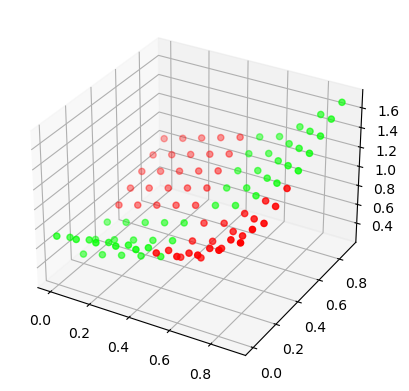

In [10]:
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

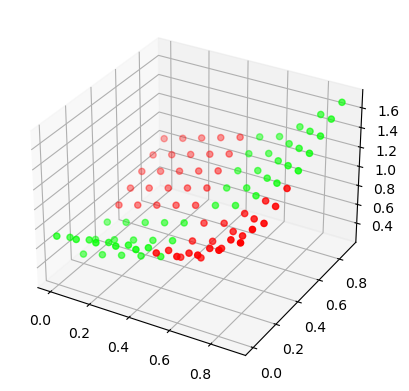

In [11]:
# fis.premises = ##################
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

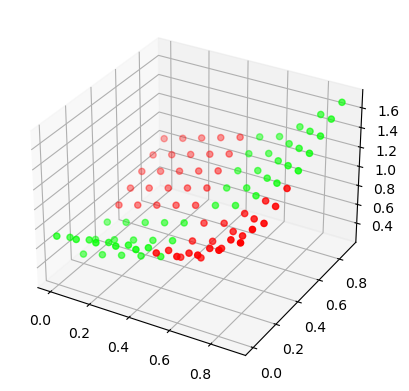

In [12]:
# fis.tsk = ##################
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

<H1>Zadanie</H1>

Naucz system ANFIS tabliczki mnożenia. Zacznij od rozmiaru 2x2 i zwiększaj w obu kierunkach z krokiem 1 (kolejno 2x2, 3x3, 4x4, 5x5). Mierz czas jaki jest potrzebny na nauczenie systemu w zależności od wymiarów tabliczki. Zrób wykres wymiaru tabliczki od czasu uczenia i wyślij wraz ze swoim komentarzem na maila iperenc@kis.p.lodz.pl. Nie musisz dojść do rozmiaru 10x10, wystarczy 5x5, ważne żeby było widać jaka jest zależność.

In [13]:
%matplotlib auto

Using matplotlib backend: <object object at 0x000001B0769674C0>


In [14]:
%matplotlib inline

In [15]:
def train_multiplication_table(n=2):
    x = np.arange(1, n, 0.1)
    x,y = np.meshgrid(x, x)

    dataX = x.flatten()
    dataY = y.flatten()
    dataXY = np.column_stack((dataX,dataY))

    data_labels = np.multiply(np.round(dataX), np.round(dataY))

    mf1 = [[n+1, 0.25, 0.5, 0.5] for n in range(n)]
    labels = [str(n+1) for n in range(n)]
    varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", labels)
    varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", labels)

    X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2)

    fis = ANFIS([varX, varY], X_train.T, y_train)

    start = time.time()
    result = fis.train(True, True, False, True, n_iter=100, float_divisions=50000)
    end = time.time()
    elapsed = end - start
    print("TIME elapsed: ", elapsed)

    fis.training_data = dataXY.T
    fis.expected_labels = data_labels
    fis.show_results()
    print("Parametry koncowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

    return result, elapsed

Current best fitness: N/A, with phenotype: N/A:   0%|          | 0/100 [00:00<?, ?it/s]E:\!SIiUM2\MSI\geneticANFIS.py:91: RuntimeWarning: invalid value encountered in divide
  Rnorm = R / Rsum
Current best fitness: 192.0000: 100%|██████████| 100/100 [00:10<00:00,  9.62it/s]      

Optymalizacja zakończona!
z blędem:   192.0
Liczba it:  100
TIME elapsed:  12.866999626159668


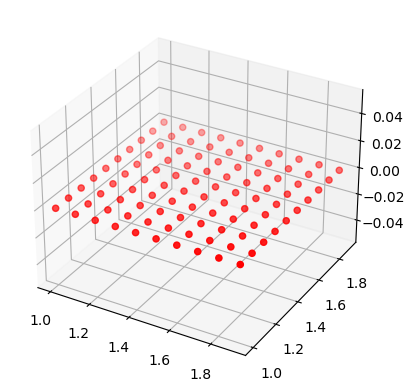

Parametry koncowe:
Przesłanki:  [[[35991.12414  4750.51316 24904.7325  12724.59674]
  [39362.86048 43630.48312  1221.3501  29026.76696]]

 [[64283.12112 60891.66358 25154.41634 76944.82578]
  [30012.70466 52831.68154 38148.59854 69027.14364]]] 
Konkluzje:  [[22774.01848 24221.52994 19107.18616]
 [32652.6025    976.54958 55534.0215 ]
 [42273.28242 18198.07432 21041.62452]
 [45503.03728  7565.67712 70674.73772]]


Current best fitness: 1265.0000: 100%|██████████| 100/100 [00:15<00:00,  6.53it/s]     


Optymalizacja zakończona!
z blędem:   1265.0
Liczba it:  100
TIME elapsed:  19.79249930381775


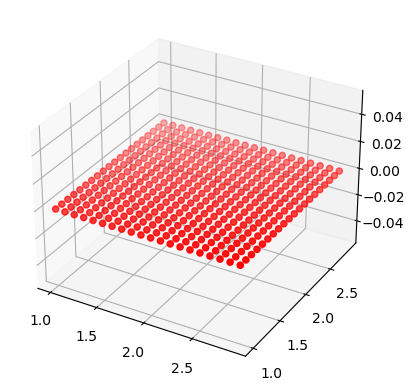

Parametry koncowe:
Przesłanki:  [[[54002.11256 26496.4699  19376.8412  84371.14216]
  [68520.69884 31528.7282  39310.82056 48446.74934]
  [84619.70046 82499.17986 27406.04732 21168.1028 ]]

 [[57515.75228   906.66372 47137.80882 63662.97506]
  [30377.22464 22860.39938  8071.04978 60637.99014]
  [33572.32994 42288.33086 65713.18582 55733.51542]]] 
Konkluzje:  [[32100.57552 39977.0066  18727.86152]
 [31632.66256 29935.76316 59788.3211 ]
 [62167.6393  28373.28242  9054.45134]
 [16580.64466 17329.34676 85703.99754]
 [21330.04272 30949.7342   5103.40196]
 [79455.39374 20761.77334 77002.01906]
 [13298.37544 26729.74972 31265.92612]
 [26578.26888 42315.5209  25325.37426]
 [59252.22818  9656.52168 22386.78474]]


Current best fitness: 4440.0000: 100%|██████████| 100/100 [00:22<00:00,  4.44it/s]     

Optymalizacja zakończona!
z blędem:   4440.0
Liczba it:  100
TIME elapsed:  29.435485363006592


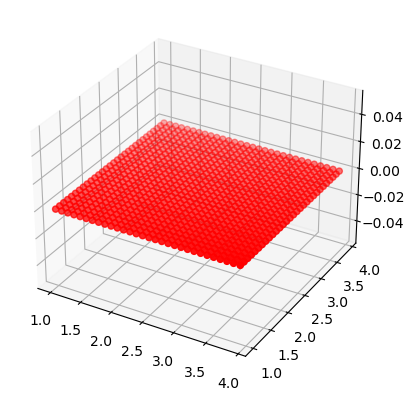

Parametry koncowe:
Przesłanki:  [[[53156.87896 34590.36836 38671.32552 69476.8142 ]
  [41420.2263  37864.96548 22772.54998 14214.2877 ]
  [25606.1208   5932.2212  64668.52106 23904.15522]
  [39065.13538 19065.62064 40749.9637  78370.7373 ]]

 [[42303.33012 20215.97594 14426.40074 48099.92676]
  [44252.53864  4010.74718  8106.97272 75161.57574]
  [50312.46116 32406.53176 18731.60752 20668.68966]
  [84372.86196  5174.32514  6400.8719  84657.58662]]] 
Konkluzje:  [[63046.482    5250.93394 34839.69358]
 [51476.89624 19031.23458 59757.51888]
 [69899.73118 44101.6581  52969.3206 ]
 [68500.95636  7759.7546  26952.98674]
 [27722.76322 62585.49356 25599.20716]
 [27663.28638 28935.2829  45516.45168]
 [48244.18334  5651.382   60213.483  ]
 [11883.38606 32051.84372 34020.18298]
 [38279.20312  5913.5528  81950.13244]
 [61331.97852 46576.63444 71474.32652]
 [73575.71564 62035.22748 60278.76244]
 [66874.12546 67435.01832 51519.96452]
 [47655.75278 80365.96218  4041.07136]
 [57684.11256 73066.0165  31

Current best fitness: 11403.0000: 100%|██████████| 100/100 [00:45<00:00,  2.22it/s]    

Optymalizacja zakończona!
z blędem:   11403.0
Liczba it:  100
TIME elapsed:  55.3589973449707


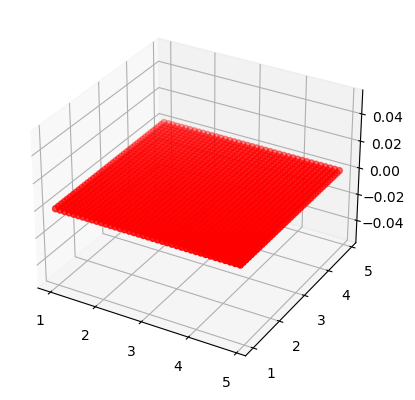

Parametry koncowe:
Przesłanki:  [[[15444.2312   7664.95052  9374.38096 81119.80496]
  [77018.62742 25430.58998 58203.9957  84822.0431 ]
  [42408.3055  37489.50928 14102.35106 71079.63442]
  [70266.64592 65769.6524  37315.16268 75768.16662]
  [37047.09112 43291.68434 14077.08416 64447.15892]]

 [[21325.4496  39952.27962 24419.8211  73728.7216 ]
  [41469.12466 25951.43404  5794.6985   9997.58194]
  [27691.92406 70448.79042 85670.63296 71192.93636]
  [69939.3215  70618.43108 85398.49986 15890.71546]
  [54943.41206 72947.11292 47877.41774 67004.98916]]] 
Konkluzje:  [[64553.36286 29018.72932 32671.59484]
 [26394.3138  55998.4872  39149.70632]
 [70322.97298 23779.20056 27761.5073 ]
 [49670.2858  67769.35162 81555.35682]
 [ 4008.60438 72319.4206  59363.84798]
 [63114.21276 56792.24746 61162.1376 ]
 [49574.0616  35224.3259  71036.62224]
 [85720.32626 17765.44582 35197.01426]
 [ 7726.10214 15617.73262 26862.427  ]
 [84372.77068 74231.7088  40932.94472]
 [72105.29568 24788.96388 67188.07188]
 [

In [16]:
times = [train_multiplication_table(n) for n in range(2, 6)]

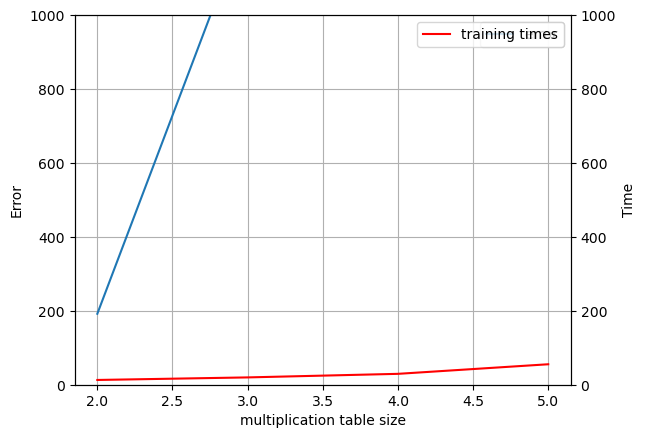

In [17]:
fig = plt.figure()
x = np.arange(2, 6, 1)
# Plotting dataset_2
ax = fig.add_subplot(111)
errors = [t[0] for t in times]
times = [t[1] for t in times]

ax.plot(x, errors, '-', label='error')

# Creating Twin axes for dataset_1
ax2 = ax.twinx()
ax2.plot(x, times, '-r', label='training times')

ax.legend(loc=0)
ax2.legend(loc=0)

ax.grid()

ax.set_xlabel("multiplication table size")
ax.set_ylabel(r"Error")
ax2.set_ylabel(r"Time")

# Setting Y limits
ax.set_ylim(0, 1000)
ax2.set_ylim(0, 1000)

# Show plot
plt.show()


In [18]:
times

[12.866999626159668, 19.79249930381775, 29.435485363006592, 55.3589973449707]

In [19]:
errors

[192.0, 1265.0, 4440.0, 11403.0]